In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./assets/melanome.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

binary_complement = cv2.bitwise_not(binary)

dist_transform = cv2.distanceTransform(binary_complement, cv2.DIST_L2, 5)

dist_gray = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
dist_gray = dist_gray.astype(np.uint8)

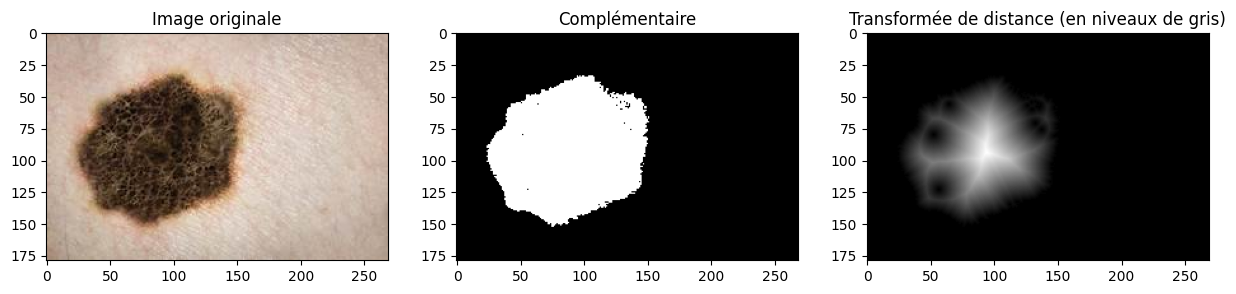

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Image originale")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title("Complémentaire")
plt.imshow(binary_complement, cmap='gray')

plt.subplot(1,3,3)
plt.title("Transformée de distance (en niveaux de gris)")
plt.imshow(dist_gray, cmap='gray')
plt.show()


In [5]:
img = cv2.imread('./assets/BLOOD1.TIF')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

binary_complement = cv2.bitwise_not(binary)

dist_transform = cv2.distanceTransform(binary_complement, cv2.DIST_L2, 5)

dist_gray = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
dist_gray = dist_gray.astype(np.uint8)

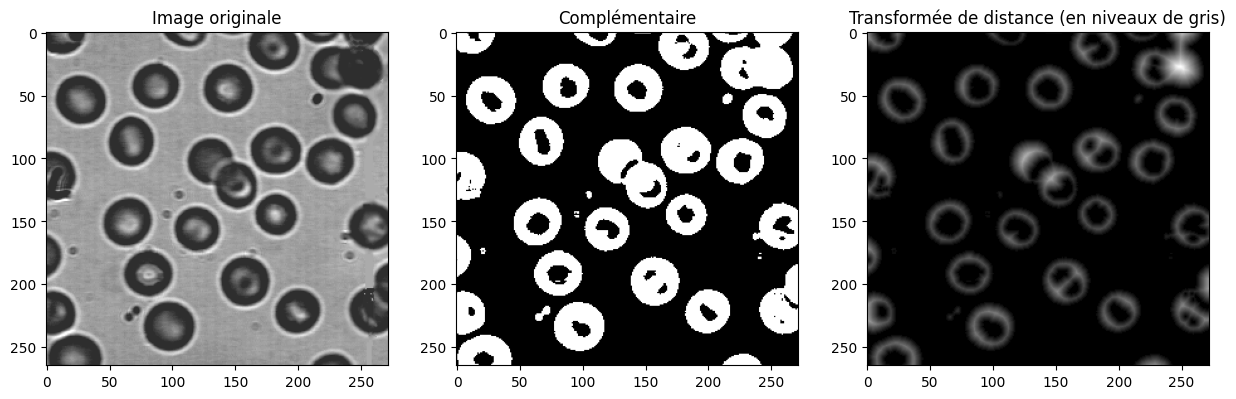

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Image originale")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title("Complémentaire")
plt.imshow(binary_complement, cmap='gray')

plt.subplot(1,3,3)
plt.title("Transformée de distance (en niveaux de gris)")
plt.imshow(dist_gray, cmap='gray')
plt.show()


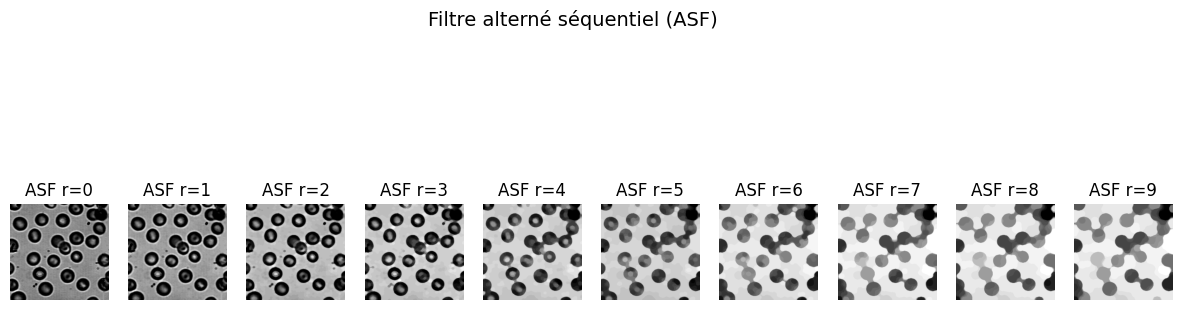

In [9]:
image_path = "../assets/MC170021.JPG"

img = cv2.imread("./assets/BLOOD1.TIF", cv2.IMREAD_GRAYSCALE)

max_radius = 9
asf_images = [img.copy()]

filtered = img.copy()
for r in range(1, max_radius + 1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*r+1, 2*r+1))
    
    filtered = cv2.morphologyEx(filtered, cv2.MORPH_CLOSE, kernel)
    filtered = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    
    asf_images.append(filtered.copy())

plt.figure(figsize=(15,5))
for i, im in enumerate(asf_images):
    plt.subplot(1, max_radius + 1, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(f"ASF r={i}")
    plt.axis('off')
plt.suptitle("Filtre alterné séquentiel (ASF)", fontsize=14)
plt.show()
